# Representation of data submission workflow components based on W3C-PROV

In [1]:
%load_ext autoreload
%autoreload 2

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/stephan/Repos/ENES-EUDAT/submission_forms')
from dkrz_forms import form_handler
from dkrz_forms import checks

from dkrz_forms.config import test_config
from dkrz_forms.config import workflow_steps

#print test_config.cordex_directory
project_dir = test_config.cordex_directory

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
.dkrz_forms myconfig imported
Settings from ~/.dkrz_forms imported
Your submission form repository: /home/stephan/tmp/CORDEX
config/test_config imported


### generate empty Prov document and load submission workflow representation 

In [2]:
from prov.model import ProvDocument
d1 = ProvDocument()

my_last_name = "ki"
my_keyword = "sk1"
form_info_json_file = project_dir + "/" + my_last_name+"_"+my_keyword+".json"
workflow_form = form_handler.load_workflow_form(form_info_json_file)

## The Provenance Model used is based the PROV standard 

 described in https://www.w3.org/TR/prov-primer/
    

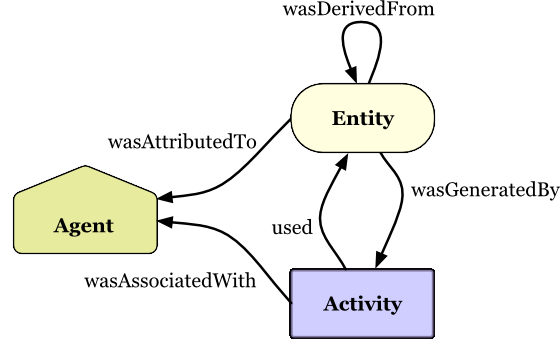

In [3]:
from IPython.display import display, Image
Image(filename='key-concepts.png')

In [4]:
from project_cordex import name_space

# add namespaces for submission provenance capture

for key,value in name_space.iteritems():
    d1.add_namespace(key,value)

#d1.add_namespace()
# to do: look into some predefined vocabs, e.g. dublin core, iso19139,foaf  etc.

d1.add_namespace("enes_entity",'http://www.enes.org/enes_entitiy#')
d1.add_namespace('enes_agent','http://www.enes.org/enes_agent#')
d1.add_namespace('data_collection','http://www.enes.org/enes_entity/file_collection')
d1.add_namespace('data_manager','http://www.enes.org/enes_agent/data_manager')
d1.add_namespace('data_provider','http://www.enes.org/enes_agent/data_provider')
d1.add_namespace('subm','http://www.enes.org/enes_entity/data_submsission')
d1.add_namespace('wf','http://www.enes.org/enes_entity/data_submsission_workflow')
d1.add_namespace('node','http://www.enes.org/enes_entity/data_submsission_state')
d1.add_namespace('foaf','http://xmlns.com/foaf/0.1/')

workflow steps config imported


<Namespace: foaf {http://xmlns.com/foaf/0.1/}>

## Example name spaces 
  (from DOI: 10.3390/ijgi5030038 , mehr unter https://github.com/tsunagun/vocab/blob/master/all_20130125.csv)
    
    owl      Web Ontology Language    http://www.w3.org/2002/07/owl#
    dctype   DCMI Type Vocabulary     http://purl.org/dc/dcmitype/
    dco      DCO  Ontology            http://info.deepcarbon.net/schema#
    prov     PROV Ontology            http://www.w3.org/ns/prov#
    skos     Simple Knowledge
             Organization System      http://www.w3.org/2004/02/skos/core#
    foaf     FOAF Ontology            http://xmlns.com/foaf/0.1/
    vivo     VIVO Ontology            http://vivoweb.org/ontology/core#
    bibo     Bibliographic Ontology   http://purl.org/ontology/bibo/
    xsd      XML Schema Datatype      http://www.w3.org/2001/XMLSchema#
    rdf      Resource Description
             Framework                http://www.w3.org/1999/02/22-rdf-syntax-ns#
    rdfs     Resource Description
             Framework Schema         http://www.w3.org/2000/01/rdf-schema#    

In [5]:
# later: organize things in bundles
data_manager_peter = {'foaf:givenName':'Peter','foaf:mbox':'lenzen@dkrz.de'}
data_manager_stephan = {'foaf:givenName':'Stephan','foaf:mbox':'kindermann@dkrz.de'}
data_manager_katharina = {'foaf:givenName':'Katharina','foaf:mbox':'berger@dkrz.de'}
data_manager_hdh = {'foaf:givenName':'hdh','foaf:mbox':'hollweg@dkrz.de'}

d1.entity('node:form_template')
def add_stage(agent,activity,in_state,out_state):
    # in_stage exists, out_stage is generated
    #d1.agent(agent, data_manager_ats)
    d1.agent(agent)
    d1.activity(activity)
    d1.entity(out_state)
   
    d1.wasGeneratedBy(out_state,activity)
    d1.used(activity,in_state)
    d1.wasAssociatedWith(activity,agent)
    d1.wasDerivedFrom(out_state,in_state)

In [6]:
sf = workflow_form
data_provider = 'data_provider:'+sf.sub.first_name+'_'+sf.sub.last_name
submission_manager = 'data_manager:'+'submission_manager'
ingest_manager = 'data_manager:'+'ingest_manager'
qua_manager = 'data_manager:'+'qua_manager' 
publication_manager =  'data_manager:'+'publication_manager'
archival_manager = 'data_manager:'+'archival_manager'

add_stage(agent=data_provider,activity='wf:submission',in_state="node:form_template",out_state='node:form_filled')
add_stage(agent=submission_manager,activity='wf:review',in_state="node:form_filled",out_state='node:form_reviewed')
add_stage(agent=ingest_manager,activity='wf:ingest',in_state="node:form_reviewed",out_state='node:data_ingested')
add_stage(agent=qua_manager,activity='wf:qua',in_state="node:data_ingested",out_state='node:data_checked')
add_stage(agent=publication_manager,activity='wf:publication',in_state="node:data_checked",out_state='node:data_published')
add_stage(agent=archival_manager,activity='wf:archival',in_state="node:data_published",out_state='node:data_archived')

## assign information to provenance graph nodes and edges

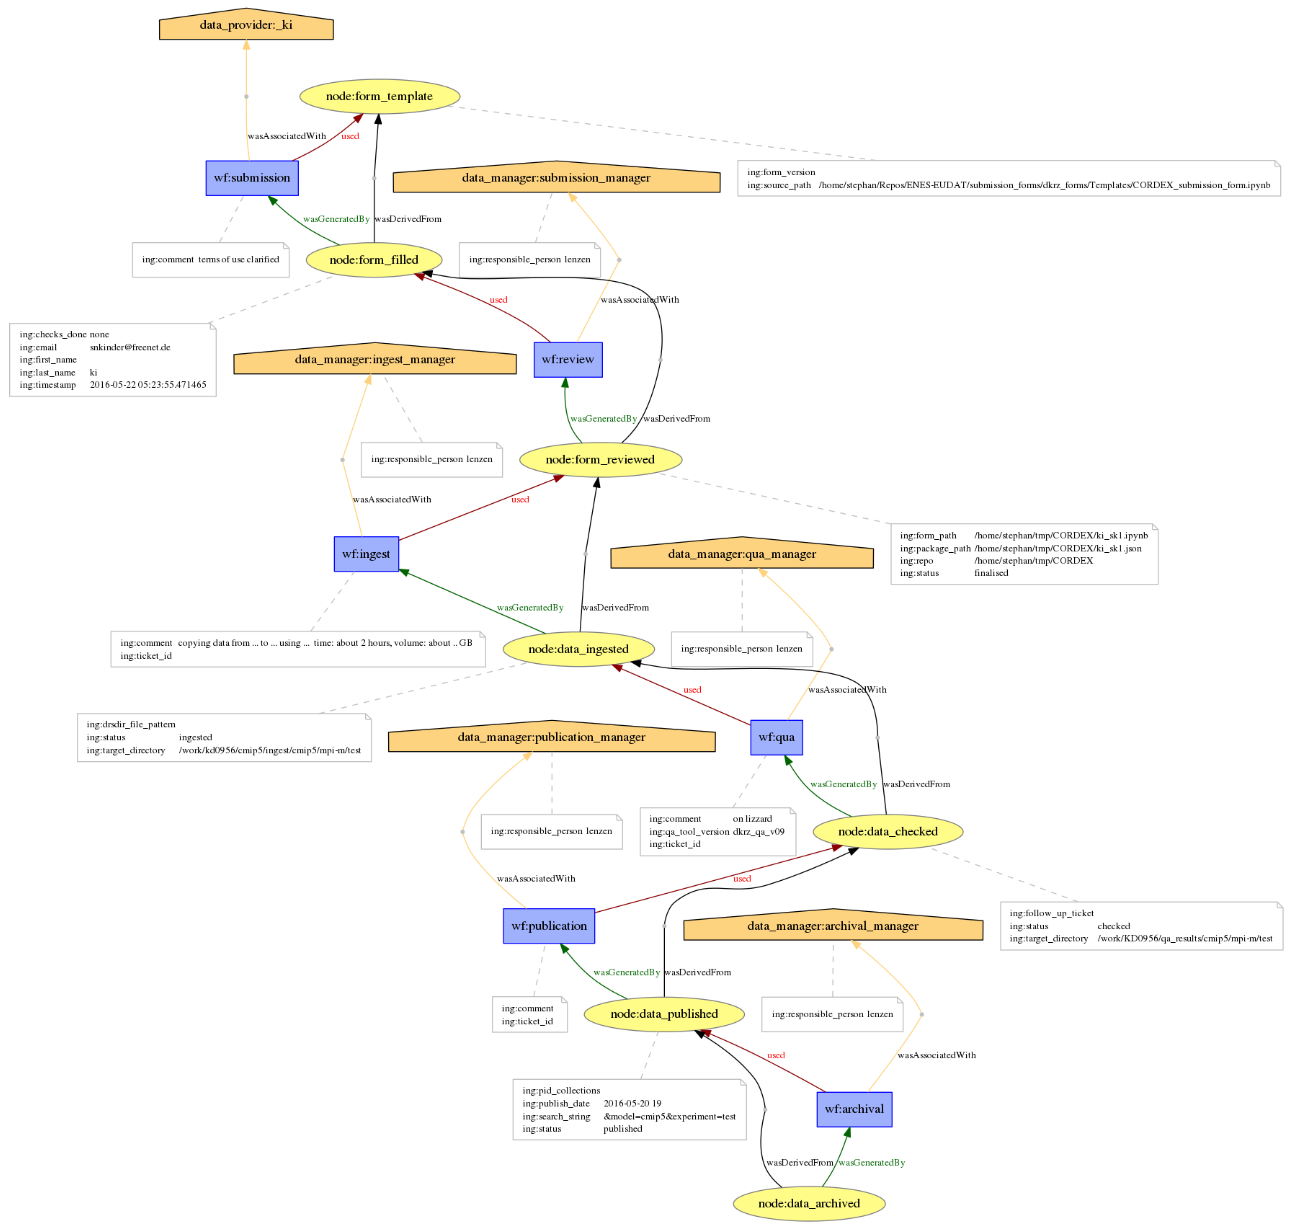

In [24]:
%matplotlib inline
d1.plot()



In [8]:
#d1.wasAttributedTo(data_submission,'????')

NameError: name 'data_submission' is not defined

# Transform submission object to a provenance graph 

In [ ]:
print d1.get_record('node:'+'form_template')[0]
wf_submission = d1.get_record('wf:submission')[0]
wf_submission.add_attributes({'sub:t':'trallala'})
print wf_submission

In [11]:
def get_prov_node(node_name):
    return d1.get_record(node_name)[0]

print get_prov_node('node:form_template')
#d1.get_records()
form_template = get_prov_node('node:form_template')
form_filled = get_prov_node('node:form_filled')
form_reviewd = get_prov_node('node:form_reviewed')
data_ingested =get_prov_node('node:data_ingested')
data_checked = get_prov_node('node:data_checked')
data_published = get_prov_node('node:data_published')
data_archived = get_prov_node('node:data_archived')


submission = get_prov_node('wf:submission')
review = get_prov_node('wf:review')
ingest = get_prov_node('wf:ingest')
qua = get_prov_node('wf:qua')
publish = get_prov_node('wf:publication')
submission_manager = get_prov_node('data_manager:submission_manager')
ingest_manager = get_prov_node('data_manager:ingest_manager')
qua_manager = get_prov_node('data_manager:qua_manager')
publication_manager = get_prov_node('data_manager:publication_manager')
archival_manager = get_prov_node('data_manager:archival_manager')


#review = d1.get_record('node:out1_rev')[0]
#ingest = d1.get_record('node:out1_ing')[0]
#check = d1.get_record('node:out1_qua')[0]
#publication = d1.get_record('node:out1_pub')[0]
#lta = d1.get_record('node:out1_arch')[0]


entity(node:form_template)


In [20]:
# todo: generalize mapping to activity and state attributes, e.g. using naming convention for attributes 
# or lists defined in workflow_steps or different namespace prefix ..
   
def get_atts_dict(atts_list,form_object):
    atts_dict = {}
    for elem in atts_list:
        atts_dict[elem] = form_object.__dict__[elem]
    
    pr_atts_dict = form_handler.prefix_dict(atts_dict,'sub',atts_dict.keys())
    return pr_atts_dict

form_template_atts_list = ['source_path','form_version']
form_filled_atts_list = ['first_name','last_name','email','timestamp','checks_done']
form_reviewed_atts_list = ['package_path','form_path','repo','status']
submission_atts_list = ['comment']
review_atts_list = ['review_comment']
ingest_atts_list = ['comment','ticket_id']
qua_atts_list = ['comment','ticket_id','qa_tool_version']
publish_atts_list = ['comment','ticket_id']
submission_manager_atts_list = ['responsible_person']
ingest_manager_atts_list = ['responsible_person']
qua_manager_atts_list = ['responsible_person']
publication_manager_atts_list = ['responsible_person']
archival_manager_atts_list = ['responsible_person']

data_ingested_atts_list = ['target_directory','drsdir_file_pattern','status']
data_checked_atts_list = ['target_directory','follow_up_ticket','status']
data_published_atts_list = ['pid_collections','search_string','publish_date','status']
#data_archived_atts_list = ['']

form_template_atts = get_atts_dict(form_template_atts_list,sf.sub)
form_filled_atts = get_atts_dict(form_filled_atts_list,sf.sub)
form_reviewed_atts = get_atts_dict(form_reviewed_atts_list,sf.sub)
submission_atts = get_atts_dict(submission_atts_list,sf.sub)
submission_manager_atts = get_atts_dict(submission_manager_atts_list,sf.sub)
ingest_manager_atts_list = get_atts_dict(ingest_manager_atts_list,sf.ing)
qua_manager_atts_list = get_atts_dict(qua_manager_atts_list,sf.qua)
publication_manager_atts_list = get_atts_dict(publication_manager_atts_list,sf.pub)
#archival_manager_atts_list = get_atts_dict(archival_manager_atts_list,sf.arch)

ingest_atts = get_atts_dict(ingest_atts_list,sf.ing)
qua_atts = get_atts_dict(qua_atts_list,sf.qua)
publish_atts = get_atts_dict(publish_atts_list,sf.pub)

data_ingested_atts = get_atts_dict(data_ingested_atts_list,sf.ing)
data_checked_atts = get_atts_dict(data_checked_atts_list,sf.qua)  
data_published_atts = get_atts_dict(data_published_atts_list,sf.pub)
#data_archived_atts = ....
print data_checked_atts
        
#ing = form_handler.prefix_dict(sf.ing.__dict__,'ing',sf.ing.__dict__.keys())
#qua = form_handler.prefix_dict(sf.qua.__dict__,'qua',sf.qua.__dict__.keys())
#pub = form_handler.prefix_dict(sf.pub.__dict__,'pub',sf.pub.__dict__.keys())

{'sub:status': u'checked', 'sub:follow_up_ticket': u'', 'sub:target_directory': u'/work/KD0956/qa_results/cmip5/mpi-m/test'}


In [23]:
form_template.add_attributes(form_template_atts)
form_filled.add_attributes(form_filled_atts)
form_reviewd.add_attributes(form_reviewed_atts)
submission.add_attributes(submission_atts)
submission_manager.add_attributes(submission_manager_atts)
ingest_manager.add_attributes(submission_manager_atts)
qua_manager.add_attributes(submission_manager_atts)
publication_manager.add_attributes(submission_manager_atts)
archival_manager.add_attributes(submission_manager_atts)
data_ingested.add_attributes(data_ingested_atts)
data_checked.add_attributes(data_checked_atts) 
data_published.add_attributes(data_published_atts) 
ingest.add_attributes(ingest_atts)
qua.add_attributes(qua_atts)
publish.add_attributes(publish_atts)

#data_archived.add_attributes(data_archived_atts)

#check.add_attributes(qua)
#publication.add_attributes(pub)

In [ ]:
che_act = d1.get_record('subm:check') 
tst = che_act[0]
test_dict = {'subm:test':'test'}
tst.add_attributes(test_dict)

In [ ]:
print tst
tst.FORMAL_ATTRIBUTES
tst.

In [ ]:
che_act = d1.get_record('subm:check') 
#tst.formal_attributes
#tst.FORMAL_ATTRIBUTES
tst.add_attributes({'foaf:name':'tst'})
print tst.attributes
#for i in tst:
 #   print i
#tst.insert([('subm:givenName','sk')])

In [ ]:
import sys
sys.path.append('/home/stephan/Repos/ENES-EUDAT/submission_forms')
from dkrz_forms import form_handler
sf,repo = form_handler.init_form("CORDEX")



init_dict = sf.__dict__ 
sub_form = form_handler.prefix(sf,'subm',sf.__dict__.keys())            

sub_dict = sub_form.__dict__

#init_state = d1.get_record('subm:empty')[0]
#init_state.add_attributes(init_dict)

sub_state = d1.get_record('subm:out1_sub')[0]
init_state.add_attributes(sub_dict)


In [ ]:
tst_dict = {'test1':'val1','test2':'val2'}
tst = form_handler.submission_form(tst_dict) 
print tst.__dict__


In [ ]:
print result.__dict__

In [ ]:
dict_from_class(sf)